词袋模型（Bag of Words Model，简称BoW）是自然语言处理（NLP）领域中一种非常基础且广泛使用的文本表示方法。该模型的核心思想是将文本简化为一个词的集合，不考虑词序和语法结构，只关注词的出现与否以及出现的频率。

### 词袋模型的基本特点

- 忽略词序：在词袋模型中，文本被表示为一个词的无序集合。这意味着模型不会考虑词在文本中的顺序，例如，“我喜欢吃苹果”和“苹果喜欢吃我”在词袋模型中被视为相同的文本。

- 词频统计：每个词在文本中出现的次数被记录下来，并作为该词在文本中的重要性的度量。通常，词频会进行归一化处理，以消除文本长度的影响。

- 词汇表构建：在对多个文本进行建模时，首先需要构建一个共享的词汇表，该词汇表包含了所有文本中出现的不同词。每个文本随后被表示为一个向量，向量中的每个元素对应于词汇表中的一个词，元素的值表示该词在文本中的频率。

### 词袋模型的文本表示

在词袋模型中，文本被转换为一个高维空间中的稀疏向量。例如，假设我们有一个简单的词汇表{"我", "喜欢", "吃", "苹果"}，如果有两句话：“我喜欢吃苹果”和“我喜欢吃香蕉”，那么这两句话在词袋模型中的表示如下：

- “我喜欢吃苹果”：[1, 1, 1, 1]
- “我喜欢吃香蕉”：[1, 1, 1, 0]

这里，向量的每个元素对应于词汇表中的一个词，元素的值表示该词在文本中出现的次数。对于不在词汇表中的词（如“香蕉”），其在表示向量中的对应位置为0。

### 词袋模型的应用

词袋模型因其简单性和易于实现的特点，在NLP的多个领域中得到了广泛应用，包括但不限于：

- 文本分类：词袋模型可以用于情感分析、垃圾邮件检测、主题分类等任务。
- 信息检索：在搜索引擎中，词袋模型可以用来评估查询词与文档的相关性。
- 主题建模：尽管词袋模型不考虑词序，但它可以与其他算法（如LDA）结合使用，来发现文本集合中的主题。

### 词袋模型的局限性

尽管词袋模型在实践中非常有效，但它也有一些明显的局限性：

- 忽略语序：词袋模型无法捕捉词序带来的语义信息，这可能会导致模型丢失重要的上下文信息。
- 无法处理同义词和多义词：由于模型只关注词的出现，而不关注词的具体含义，因此无法区分同义词和多义词。
- 稀疏性问题：在大规模文本数据集中，词汇表可能非常庞大，导致向量维度很高，这会造成稀疏性问题，并可能影响计算效率和模型性能。

尽管存在这些局限性，词袋模型仍然是自然语言处理中一个非常有用的工具，尤其是在处理大规模文本数据时。此外，词袋模型也是许多更复杂文本表示方法的基础，如TF-IDF、Word2Vec、BERT等。

## BoW for Tweets

In [2]:
# 数据表
import pandas as pd

# 数组运算
import  numpy as np

# 英文语料处理
import nltk

# 正则表达式（用于数据清洗）
import re

import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

# 词袋模型自然语言处理
from sklearn.feature_extraction.text import CountVectorizer

# TF-IDF自然语言处理
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# 导入数据
text_twi = pd.read_csv(r'text_analysis_twitter.csv')
text_twi = text_twi.drop(['Unnamed: 0'], axis=1)

In [5]:
text_twi

,id,screen_name,time,link,text,source
0,881004944714866688,KamalaHarris,2017-07-01T00:22:01-04:00,https://www.twitter.com/KamalaHarris/statuses/...,Republicans are trying to steal health care fr...,Sprout Social
1,881002538341986304,MarcVeasey,2017-07-01T00:12:28-04:00,https://www.twitter.com/kylegriffin1/statuses/...,RT @kylegriffin1 Rep. Mark Veasay has introduc...,Twitter for Android
2,881001393284419584,RepPaulTonko,2017-07-01T00:07:55-04:00,https://www.twitter.com/RepPaulTonko/statuses/...,A top U.S. science office went dark tonight. N...,Twitter for iPhone
3,881000301007958016,clairecmc,2017-07-01T00:03:34-04:00,https://www.twitter.com/clairecmc/statuses/881...,So the fundraising quarter ends in an hour in ...,Twitter for iPad
4,881015727540637696,tedcruz,2017-07-01T01:04:52-04:00,https://www.twitter.com/larry_kudlow/statuses/...,RT @larry_kudlow Important story @SenTedCruz @...,Twitter for iPhone
...,...,...,...,...,...,...
299995,939743413909549056,RepTedLieu,2017-12-10T01:27:44-05:00,https://www.twitter.com/ReadyLA/statuses/93956...,RT @ReadyLA REPORT FIRE DAMAGE from #CreekFire...,Twitter for iPhone
299996,939743003203301376,RepTedLieu,2017-12-10T01:26:06-05:00,https://www.twitter.com/LAFDtalk/statuses/9397...,RT @LAFDtalk Once a wildfire has burned throug...,Twitter for iPhone
299997,939741567706730497,JuliaBrownley26,2017-12-10T01:20:23-05:00,https://www.twitter.com/SCE/statuses/939739240...,"RT @SCE Update: As of 8:30pm, Saturday, about ...",Twitter Web Client
299998,939739240501596160,SteveKnight25,2017-12-10T01:11:09-05:00,https://www.twitter.com/santaclarita/statuses/...,RT @santaclarita #RyeFire Evening Update (12/9...,Twitter for iPhone


In [8]:
# 随机选择数据集的百分之一
sample_ratio = 0.01  # 设置要采样的比例
text_twi_sampled = text_twi.sample(frac=sample_ratio, random_state=1)  # 随机采样

# 查看采样后的数据
text_twi_sampled.head()

,id,screen_name,time,link,text,source
205179,923286797383282690,USProgressives,2017-10-25T16:35:00-04:00,https://www.twitter.com/USProgressives/statuse...,@HouseGOP &amp; @SenateGOP definition of middl...,TweetDeck
101710,905097331296673794,OversightDems,2017-09-05T11:56:34-04:00,https://www.twitter.com/OversightDems/statuses...,@RepCummings .@RepCummings: I urge Speaker Rya...,Twitter Web Client
89106,900780123787599872,ChrisMurphyCT,2017-08-24T14:01:31-04:00,https://www.twitter.com/ChrisMurphyCT/statuses...,Joined @BizFairfield to hear from people in th...,TweetDeck
193046,921191411013373956,SenPatRoberts,2017-10-19T21:48:41-04:00,https://www.twitter.com/SenPatRoberts/statuses...,NEWS RELEASE: Roberts votes to advance #TaxRef...,TweetDeck
99093,902922039920603140,McCaskillOffice,2017-08-30T11:52:44-04:00,https://www.twitter.com/McCaskillOffice/status...,See more pics of Claire’s visit w/ Marleen &am...,Twitter Web Client


In [9]:
# 观察text列
text_list = list(text_twi_sampled['text'])
text_list[:5]

['@HouseGOP &amp; @SenateGOP definition of middle class = the middle of the page on their major donor list. #FakeMath',
 '@RepCummings .@RepCummings: I urge Speaker Ryan to stop blocking a vote in the House of Representatives on bipartisan legislation to protect #DREAMers.',
 'Joined @BizFairfield to hear from people in the community about the NEC FUTURE plan for improving rail service along the Northeast Corridor',
 'NEWS RELEASE: Roberts votes to advance #TaxReform; Senate approves budget resolution http://bit.ly/2ioubnz',
 'See more pics of Claire’s visit w/ Marleen &amp; Wanda here (https://www.flickr.com/photos/senatormccaskill/albums/72157685439275861/with/36110719603/) + check out @ppfs2017 for ways to get involved! (End.) http://pbs.twimg.com/media/DIfSu0uWAAEsr1Y.jpg']

In [ ]:
# 从NLTK库下载一些预训练的数据集和模型

# 将文本划分为句子
nltk.download('punkt')

# 停用词
nltk.download('stopwords')

# wordnet是一个大型的英语词汇数据库，它提供了词之间的多种语义关系，如同义词、反义词、上位词等。在NLTK中，wordnet资源常用于词义消歧、同义词替换、语义分析等任务。
nltk.download('wordnet')

# 词性标注（如名词、动词、形容词等）
nltk.download('averaged_perceptron_tagger')

In [10]:
def preprocess_text(text):
    # 小写
    text = text.lower()
    
    # 用空字符串替换http后面的连续非空字符串，即删除url
    text = re.sub(r'http\S+', '',text)
    
    # 分词
    tokens = word_tokenize(text)
    
    # 去除停用词
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    
    # 去除标点符号和数字 和其他一些字符
    filtered_tokens = [word for word in filtered_tokens if word.isalpha() and word !='rt']
    #filtered_tokens = [word for word in filtered_tokens if word not in string.punctuation]
    
    # 词性标注与筛选
    #pos_tags = pos_tag(filtered_tokens)
    #selected_tokens = [word  for word, pos in pos_tags if pos.startswith('N') or pos.startswith('J') or pos.startswith('V')]
    
    # 词性还原
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
  
    # 返回预处理后的文本
    return ' '.join(lemmatized_tokens)


# 定义函数将词性标签映射到 WordNet 词性标签
# def get_wordnet_pos(treebank_tag):
#     if treebank_tag.startswith('J'):
#         return 'a'  # 形容词
#     elif treebank_tag.startswith('V'):
#         return 'v'  # 动词
#     elif treebank_tag.startswith('N'):
#         return 'n'  # 名词
#     else:
#         return None  # 默认为名词

text_twi_sampled['text_clean'] = text_twi_sampled['text'].apply(preprocess_text)

In [11]:
text_clean = list(text_twi_sampled['text_clean'])
text_clean[:10]

['housegop amp senategop definition middle class middle page major donor list fakemath',
 'repcummings repcummings urge speaker ryan stop blocking vote house representative bipartisan legislation protect dreamer',
 'joined bizfairfield hear people community nec future plan improving rail service along northeast corridor',
 'news release robert vote advance taxreform senate approves budget resolution',
 'see pic claire visit marleen amp wanda check way get involved end',
 'housesbcdems today hearing repdwightevans asked panelist congress simplify reform tax code help small business',
 'nbvccalifornia nbvc continues fully operational thomasfire contained update continue monitor qt updated fire perimeter map thomasfire',
 'nciladvocacy among vulnerable country medicaid decimated amp every american grateful unswerving support',
 'recently center medicare amp medicaid service cm placed two year suspension direct supervision rule however failed include introduced bill fix issue',
 'appropria

In [12]:
# 计算词频

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text_clean)

# 获得词汇表
feature_words = vectorizer.get_feature_names_out()

word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

#sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# 然后只取排序后的前20个元素
top_20_words = sorted_word_freq[:20]

# 打印或者返回这20个元素
for word, freq in top_20_words:
    print(f"{word}: {freq}")


amp: 659
qt: 362
tax: 323
today: 228
bill: 215
american: 212
trump: 192
family: 167
need: 155
people: 138
health: 135
great: 129
care: 126
act: 122
must: 122
gop: 118
senate: 117
new: 115
help: 113
house: 111


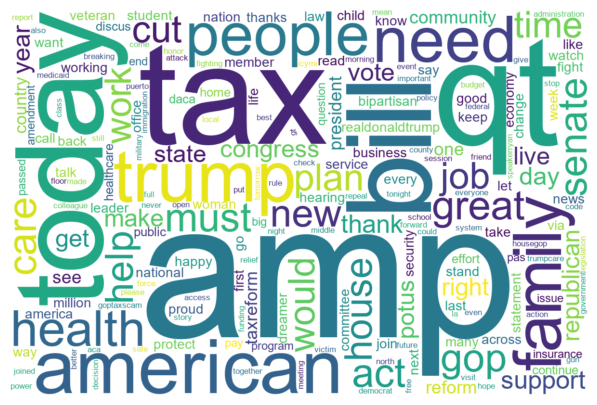

In [13]:
# 词云图
wordcloud = WordCloud(width=1200, height=800, background_color='white', font_path='arial.ttf').generate_from_frequencies(word_freq)

# 可视化
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
#plt.savefig('wordcloud_twi.png', dpi=100)

## BoW for Weibo

In [14]:
import pandas as pd
import  numpy as np
import nltk
import re
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
# 导入数据
text_weibo = pd.read_csv(r'text_analysis_weibo.csv')
text_weibo = text_weibo.drop(['Unnamed: 0'],axis = 1)
text_weibo.head()

,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 ​​,0,0,0,a2331b38901d62d2d9a20529177ef3b3,0,22,湖北
1,转发C,0,0,0,d6dc4470f51fce93cc0cbad8abf55a75,0,33,广西
2,【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待...,0,0,0,372bc4782eb442b88035f920a7c1a68e,6,85,广东
3,丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一...,0,0,0,6fe0d482bd3e78a3483e2a1d57f14ef2,75,1012,广东
4,诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！,0,0,0,872380d71d6ee9130e8b49d331f2baa9,0,10,广东


In [16]:
# 随机选择数据集的百分之一
sample_ratio = 0.01  # 设置要采样的比例
text_weibo_sampled = text_weibo.sample(frac=sample_ratio, random_state=1)  # 随机采样

# 查看采样后的数据
text_weibo_sampled.head()

,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
26247,#肖战# xz #肖战粉丝小飞侠31城公益#,0,0,0,2693c10220678f9a41cdae9c18edf34b,578,921,广东
35067,转发C,0,0,0,7e570dea5b211f69982c442f19c045c5,82,47,河南
34590,【左瑾言:11.17黄金最新走势分析，黄金日内最新操作策略建议。】黄金消息面解读：昨天晚上，...,0,0,0,9da3948d7304b268bbad57dbbfec0402,16,1,北京
16668,#第二轮双一流名单发布# 看来教育部相关负责人是外宾。你发布985、211、双一流，嘴上说...,0,0,0,91b94a79f58ba440bb8283831765c2b4,93,128,江苏
12196,烦恼就是在一堆不是很好的选择里也唯恐选错了[笑cry],0,0,0,62fe081b654ea26229727945bd6649b8,262,222,江苏


In [17]:
# 分析语料
text_w= list(text_weibo_sampled['标题/微博内容'])
text_w[:5]

['#肖战#  xz #肖战粉丝小飞侠31城公益#',
 '转发C',
 '【左瑾言:11.17黄金最新走势分析，黄金日内最新操作策略建议。】黄金消息面解读：昨天晚上，美国公布了10月生产者物价指数PPI数据，月率录得0.2%增幅，意外低于预期。而年率则从8.45回落至8%,数据再次被视为通胀可能触顶、支持美联储尽早转鸽的信号。但是昨天非美资产的表现却并不理想，和上周cpi数据后的大涨不同，多数只是冲高回落而已。一方面是市场对此有预期的原因，另一方面也是之前的资产价格涨幅已经不少了，上方空间比较有限。此外，费城联储主席哈克认为，未来几个月加息步伐将放缓，将在2023年某个时间点停止加息且维持利率高位不变。亚特兰大联储主席博斯蒂克称，美联储的政策行动有可能引发衰退，但这比高通胀根深蒂固要好。基本上坚持了美联储一贯的强势特点，语气缓和柔中带钢！ 黄金走势分析： 短线1小时方面，在金价进入到窄幅的上行通道之后，一路震荡上行，k线高点和低点不断的小幅上移，上涨结构完整，MACD指标在k线进入通道后，也是出现了持续的顶背离信号，昨天新高后，已经出现了第三段的顶背离，预示着回调需求越来越大，今天注意的是金价会没有新高，直接回调，还是说最后再走一个高点，如果今天再度走高，预计将会是最后一个高点，然后你会看到新高后，动能柱完全没有多头动能，只有零轴下方绿色能量柱的放量，届时将会开始真正的顶背离修正，k线的表现则是跌破低点1767，此位置是目前的水平支撑，跌破此也是上行结构出现破坏的标志，1小时顶背离开始修正后的初步目标预计在1745-50，到这个区间后，观察行情的反应，再做进一步操作，今日短线上逢高做空为主，上方关注1776-1782附近阻力，下方关注1767一线支撑。黄金早盘策略：建议1776轻仓空，1782加仓空，止损1786，目标1767-1755；====做外汇投资的你为何频繁亏损？====其一：逆市操作-方向反了就抗，抗了亏损就加剧，实在不行就止损，止损了方向又回来了，或是买涨的时候行情就跌，买跌的时候行情就涨，永远跟不上节奏。其二：不设置止损-就等于直接把钱扔掉，这是讲烂了，强调的不想再强调的问题了，我这人说话比较直、不喜欢拐弯抹角，一句话，如果你不止损，不管你的单子是赚是亏，再多的钱迟早有一天，到时也会玩完、亏的没地方哭。其三：频繁操作-无论单子理不理想，不负责任的老

In [19]:
stopwords = open(r'D:\Study\课程与作业\文本数据分析\Week6词袋模型\stopwords.txt', encoding = 'utf-8').read()

In [20]:
# 数据预处理
def data_preprocess_chi(text):
    # 剔除符号与数字
    nonums_text = re.sub('[^\u4e00-\u9fa5]+', '', str(text))
        
    # 分词
    words = jieba.cut(nonums_text)
    
    # 去除停用词
    words = [w for w in words if w not in list(stopwords) and w!='\u200b' and w!='转发']
    
    return ' '.join(words)

text_weibo_sampled['clean_text'] = text_weibo_sampled['标题/微博内容'].apply(data_preprocess_chi)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\RIVERP~1.LAP\AppData\Local\Temp\jieba.cache
Loading model cost 0.461 seconds.
Prefix dict has been built successfully.


In [21]:
# 展示预处理成果
text = list(text_weibo_sampled['clean_text'])
text[:10]

['肖战 肖战 粉丝 小飞侠 城 公益',
 '',
 '左瑾言 黄金 最新 走势 分析 黄金 日内 最新 操作 策略 建议 黄金 消息面 解读 昨天晚上 美国 公布 月 生产者 物价指数 数据 月 率 录得 增幅 意外 低于 预期 年率 回落 数据 再次 视为 通胀 可能 触顶 支持 美联储 尽早 转鸽 信号 但是 昨天 非美 资产 表现 理想 上周 数据 大涨 不同 多数 只是 冲高 回落 而已 一方面 市场 对此 预期 原因 另一方面 之前 资产 价格 涨幅 已经 不少 上方 空间 比较 有限 此外 费城 联储 主席 哈克 认为 未来 几个 月 加息 步伐 放缓 某个 时间 停止 加息 维持 利率 高位 不变 亚特兰大 联储 主席 博斯蒂克称 美联储 政策 行动 可能 引发 衰退 比高 通胀 根深蒂固 基本上 坚持 美联储 一贯 强势 特点 语气 缓和 柔中 带钢 黄金 走势 分析 短线 小时 方面 金价 进入 窄幅 上行 通道 之后 一路 震荡 上行 线 高点 低点 不断 小幅 上移 上涨 结构 完整 指标 在线 进入 通道 出现 持续 顶背离 信号 昨天 新高 已经 出现 第三段 顶背离 预示 回调 需求 越来越 今天 注意 金价 没有 新高 直接 回调 还是 最后 走 一个 高点 如果 今天 再度 走高 预计 将会 最后 一个 高点 然后 看到 新高 动能 柱 完全 没有 多头 动能 只有 零轴 下方 绿色 能量 柱 放量 届时 将会 开始 真正 顶背离 修正 线 表现 跌破 低点 位置 目前 水平 支撑 跌破 上行 结构 出现 破坏 标志 小时 顶背离 开始 修正 初步 目标 预计 这个 区间 观察 行情 反应 进一步 操作 今日 短线 上逢 空 为主 上方 关注 附近 阻力 下方 关注 一线 支撑 黄金 早盘 策略 建议 轻仓 空加 仓空 止损 目标 外汇 投资 为何 频繁 亏损 其一 逆市 操作 方向 抗抗 亏损 加剧 实在 不行 止损 止损 方向 回来 或是 买涨 时候 行情 跌 买 跌 时候 行情 涨 永远 跟不上 节奏 其二 设置 止损 等于 直接 钱 扔掉 这是 讲烂 强调 不想 强调 问题 这人 说话 比较 喜欢 拐弯抹角 一句 如果 止损 不管 单子 赚 亏 钱 迟早 一天 玩完 亏 地方 哭 其三 频繁 操作 无论 单子 理不 理想 

In [22]:
# 计算词频

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

# 排序
#sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

#查看排序后的前20个最常见词汇
top_20_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]

top_20_words

[('汽车', 512),
 ('发展', 469),
 ('市场', 423),
 ('中国', 419),
 ('建设', 394),
 ('增长', 289),
 ('公司', 288),
 ('企业', 279),
 ('国家', 266),
 ('介绍', 252),
 ('行业', 233),
 ('学校', 228),
 ('项目', 223),
 ('全球', 220),
 ('我国', 214),
 ('投资', 210),
 ('经济', 194),
 ('亿元', 190),
 ('同比', 188),
 ('大学', 185)]

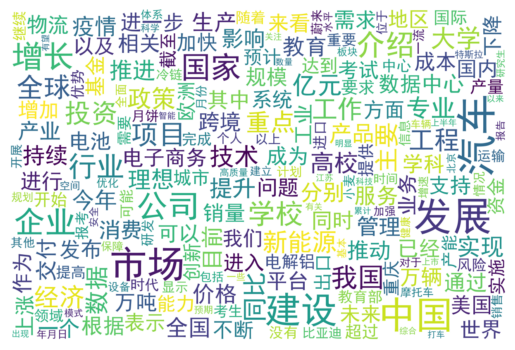

In [23]:
# 可视化词云图
wordcloud = WordCloud(
    font_path='simhei.ttf',  
    background_color='white',  
    width=1200,
    height=800,
    max_words=200,  
    max_font_size=100  
).generate_from_frequencies(word_freq)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## BoW for Congressional Record

对第43届美国国会少数族裔议员的发言进行词频分析

In [2]:
import pandas as pd
import  numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
CR_43 = pd.read_csv(r'D:\data\session_043_with_party.csv')
CR_43

,speech_id,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count,speech,party
0,430000001,S,18730304.0,1.0,The VICE-PRESIDENT,Unknown,Unknown,Unknown,Special,39.0,65.0,03041873.txt,972.0,161.0,The Secretary will read the names of the newly...,NaN
1,430000002,S,18730304.0,2.0,Mr. HAMLIN,Unknown,HAMLIN,Unknown,M,66.0,71.0,03041873.txt,298.0,54.0,said: Mr. President. owing to some inadvertenc...,R
2,430000003,S,18730304.0,3.0,The VICE-PRESIDENT,Unknown,Unknown,Unknown,Special,72.0,73.0,03041873.txt,56.0,11.0,The question is on the motion of the Senator f...,NaN
3,430000004,S,18730304.0,4.0,The VICE-PRESIDENT,Unknown,Unknown,Unknown,Special,137.0,147.0,03041873.txt,472.0,75.0,The order of proceedings will now be formed. f...,NaN
4,430000005,S,18730304.0,5.0,The PRESIDENT,Unknown,Unknown,Unknown,Special,148.0,158.0,03041873.txt,454.0,72.0,of the United States. the PRESIDENTELEcT. The ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117327,430119298,H,18750303.0,3931.0,Mr. GARFIELD,Unknown,GARFIELD,Unknown,M,29300.0,29303.0,03031875.txt,213.0,39.0,I also present the report of the expenditures ...,R
117328,430119299,H,18750303.0,3932.0,Mr. HOLMAN,Unknown,HOLMAN,Unknown,M,29380.0,29382.0,03031875.txt,145.0,28.0,I ask that the amendment to this bill may be r...,D
117329,430119300,H,18750303.0,3933.0,Mr. HOLMAN,Unknown,HOLMAN,Unknown,M,29383.0,29385.0,03031875.txt,82.0,14.0,I move concurrence in the amendment of the Sen...,D
117330,430119301,H,18750303.0,3934.0,Mr. DAWES,Unknown,DAWES,Unknown,M,29930.0,29935.0,03031875.txt,355.0,60.0,Mr. Speaker. the joint committee of the two Ho...,R


In [5]:
# 43rd共有四位少数族裔议员，他们的姓氏分别是LYNCH, RAPIER, RANSIER, CAIN
names = ["LYNCH", "RAPIER", "RANSIER", "CAIN"]

# 使用isin()函数来筛选出这些行
filtered_CR_43 = CR_43[CR_43['last_name'].isin(names)]

# 显示筛选后的数据
filtered_CR_43

,speech_id,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count,speech,party
3596,430003602,H,18731209.0,195.0,Mr. LYNCH,Unknown,LYNCH,Unknown,M,3367.0,3368.0,12091873.txt,68.0,15.0,I desire to offer ai amendment. which I send t...,R
3597,430003603,H,18731209.0,196.0,Mr. LYNCH,Unknown,LYNCH,Unknown,M,3382.0,3492.0,12091873.txt,6326.0,1142.0,Mr. Speaker. it will be seen that the amendmen...,R
4303,430004362,H,18731212.0,175.0,Mr. LYNCH,Unknown,LYNCH,Unknown,M,2208.0,2210.0,12121873.txt,170.0,31.0,If the motion of the gentleman from Indiana sh...,R
4631,430004690,H,18731215.0,189.0,Mr. RANSIER,Unknown,RANSIER,Unknown,M,2416.0,2422.0,12151873.txt,424.0,78.0,I Ase to a correction of the Journal. I call t...,R
6218,430006294,H,18731218.0,459.0,Mr. RANSIER,Unknown,RANSIER,Unknown,M,5174.0,5174.0,12181873.txt,9.0,2.0,I olject.,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93837,430095673,H,18750204.0,308.0,Mr. CAIN,Unknown,CAIN,Unknown,M,4090.0,4098.0,02041875.txt,1014.0,200.0,One word in conclusion. I think I have answere...,R
94144,430095980,H,18750204.0,615.0,Mr. RAPIER,Unknown,RAPIER,Unknown,M,7603.0,7608.0,02041875.txt,337.0,65.0,I have sought the floor today for one purpose ...,R
94145,430095981,H,18750204.0,616.0,Mr. RAPIER,Unknown,RAPIER,Unknown,M,7617.0,7620.0,02041875.txt,192.0,36.0,That I deny. Mr. Speaker. The last time the co...,R
94146,430095982,H,18750204.0,617.0,Mr. RAPIER,Unknown,RAPIER,Unknown,M,7626.0,7666.0,02041875.txt,2537.0,485.0,That class of people commissioned me to speak ...,R


In [6]:
# 观察text列
speech_list = list(filtered_CR_43['speech'])
speech_list[:5]

['I desire to offer ai amendment. which I send to the desk to be read.',
 'Mr. Speaker. it will be seen that the amendment I offered contains several propositions. One is to strike out that per-" tion of the hill which coutemplates a reduction of tbepay of the VicePresident and the Speaker of the House. The other is to fix the pay of Senators. Representatives. and Delegates at $6.000 per annum. with the proviso. however. that the change shall not take effect during the present Congress. Now. I will state the reason why I propose that amendment. I am satisfied that. so far as the people of the district I represent are concerned. they are satisfied with the law as it now stands. They do not object to $7.500 per annmi for a member of Congress. but what they did object to (and what they do still object to) was the clause making the increase retroactive. That was what they thought wrong. I am satisfied myself that Congress ought not to alter the compensation of members so as to affect the m

In [7]:
# 初始化词性还原器
lemmatizer = WordNetLemmatizer()

# 定义停用词
stop_words = set(stopwords.words('english'))

def clean_speech(speech):
    # 分词
    word_tokens = word_tokenize(speech)
    
    # 去停用词
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    
    # 去除标点数字与其他字符
    words = [word for word in filtered_sentence if word.isalpha()]
    
    # 词性还原
    lemmatized_words = [lemmatizer.lemmatize(w) for w in words]
    
    return lemmatized_words

# 应用函数到speech列
filtered_CR_43['speech'] = filtered_CR_43['speech'].apply(clean_speech)

C:\Users\River Phoenix.LAPTOP-PS8GAOTQ\AppData\Local\Temp\ipykernel_37780\102224615.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_CR_43['speech'] = filtered_CR_43['speech'].apply(clean_speech)


In [10]:
speech = list(filtered_CR_43['speech'])
print(speech[:5])

[['I', 'desire', 'offer', 'ai', 'amendment', 'I', 'send', 'desk', 'read'], ['Speaker', 'seen', 'amendment', 'I', 'offered', 'contains', 'several', 'proposition', 'One', 'strike', 'tion', 'hill', 'coutemplates', 'reduction', 'tbepay', 'VicePresident', 'Speaker', 'House', 'The', 'fix', 'pay', 'Senators', 'Representatives', 'Delegates', 'per', 'annum', 'proviso', 'however', 'change', 'shall', 'take', 'effect', 'present', 'Congress', 'Now', 'I', 'state', 'reason', 'I', 'propose', 'amendment', 'I', 'satisfied', 'far', 'people', 'district', 'I', 'represent', 'concerned', 'satisfied', 'law', 'stand', 'They', 'object', 'per', 'annmi', 'member', 'Congress', 'object', 'still', 'object', 'clause', 'making', 'increase', 'retroactive', 'That', 'thought', 'wrong', 'I', 'satisfied', 'Congress', 'ought', 'alter', 'compensation', 'member', 'affect', 'member', 'Congross', 'maling', 'change', 'That', 'position', 'I', 'stand', 'upon', 'I', 'ready', 'whenever', 'opportunity', 'present', 'vote', 'aniendineu

In [13]:
from collections import Counter

# 将所有的speech合并成一个大的列表
all_words = [word for speech in filtered_CR_43['speech'] for word in speech]

# 使用Counter来计算词频
word_counts = Counter(all_words)

# 打印出排名前20的词汇及其对应的数量
for word, count in word_counts.most_common(20):
    #print(word, count)
    print(f"{word}: {count}")

I: 571
right: 166
gentleman: 143
people: 140
would: 126
colored: 125
country: 121
The: 104
bill: 103
men: 90
u: 87
law: 86
South: 82
upon: 81
say: 78
State: 75
every: 72
race: 72
nation: 72
shall: 67


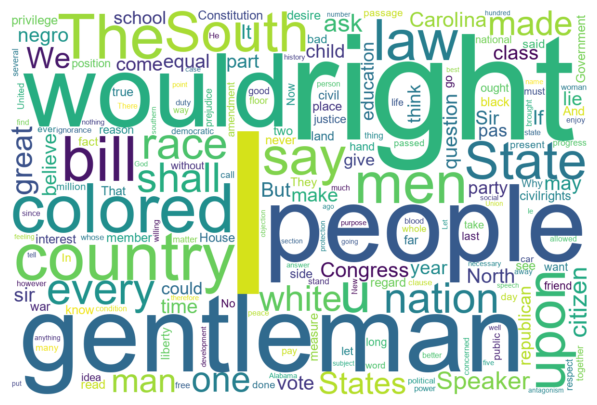

In [16]:
# 词云图
wordcloud = WordCloud(width=1200, height=800, background_color='white', font_path='arial.ttf').generate_from_frequencies(word_counts)

# 可视化
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()